## Importation des packages nécessaires

In [5]:
%matplotlib inline

#Gestion des données
import numpy as np
import pandas as pd
import folium

#Visualisation
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
import missingno as msno

#Machine Learning Package
import sklearn as sk
import xgboost as xgb

#Sauvegarde des données sur le disque dur
import pickle

# Exploration

La première étape est de séparer les cancers par groupes dans un fichier annexe, pour pouvoir mieux les comprendre ; et de séparer les pays selons différents agrégats.

Tri à la main des trois groupes de cancers suivants: cancers digestifs, cancers gynécologiques, cancer du pancréas.

In [6]:
cancer_group=pd.read_csv("/Users/Jenny/Desktop/P3A/incidence_dataset/cancer_codes_modif.csv", sep =";")

In [7]:
cancers = pd.read_csv("/Users/Jenny/Desktop/P3A/incidence_dataset/cancer_codes.csv", sep =";")

In [8]:
sep = cancers['code'].str.split('-')
#
#if len(sep) == 1:
#    cancers['debut'] = sep[0]
#    cancers['fin'] = sep[0]
#else:
#    cancers['debut'] = sep[0]
#    cancers['fin'] = sep[1]

Tri à la main des pays récupérés sur la worldbank data pour séparer les pays en sous-groupes.

In [9]:
afrique = ['Angola','Burundi', 'Benin', 'Burkina Faso', 'Botswana', 'Central African Republic', "Cote d'Ivoire", 
'Cameroon', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Comoros', 'Cabo Verde', 'Djibouti', 'Algeria', 'Egypt, Arab Rep.', 
'Eritrea', 'Ethiopia','Gabon','Ghana', 'Guinea', 'Gambia, The', 'Guinea-Bissau', 'Equatorial Guinea', 'Kenya',
'Liberia', 'Libya', 'Lesotho','Morocco','Madagascar','Mali','Mozambique', 'Mauritania', 'Mauritius', 
'Malawi', 'Namibia', 'Niger','Nigeria','Rwanda','Sudan', 'Senegal','Sierra Leone', 'Somalia','South Sudan', 'Seychelles',
'Sao Tome and Principe','Swaziland','Chad','Togo','Tunisia', 'Tanzania', 'Uganda','South Africa', 'Zambia', 'Zimbabwe']
#Test pays_afrique: seulement Mauritius et South Africa sont gérés.

am_sud = ['Aruba', 'Bolivia', 'Brazil', 'Argentina',  'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Peru','Paraguay','Suriname','Uruguay','Venezuela, RB', 'Curacao']

asie = ['Afghanistan', 'Armenia',  'Bahrain', 'Bangladesh', 'Bhutan',
 'Brunei Darussalam',  'China',  'Indonesia','India', 'Hong Kong SAR, China',  'Japan', 'Iran, Islamic Rep.',
 'Iraq', 'Israel', 'Jordan', 'Kazakhstan', 'Kyrgyz Republic', 'Cambodia',
 'Korea, Rep.', 'Kuwait',  'Lao PDR', 'Lebanon', 'Sri Lanka', 'Macao SAR, China',
 'Maldives', 'Mongolia', 'Malaysia', 'Nepal', 'Oman', 'Pakistan', 'Philippines',
 'Korea, Dem. People’s Rep.', 'Qatar', 'Russian Federation', 'Saudi Arabia', 'Singapore',
 'Syrian Arab Republic', 'Thailand', 'Tajikistan', 'Turkmenistan', 'Turkey',
 'Uzbekistan', 'Vietnam', 'Yemen, Rep.', 'United Arab Emirates',  'West Bank and Gaza',
 'Myanmar', 'Guam', 'Timor-Leste']

europe = ['Albania', 'Austria', 'Belgium', 'Andorra',  'Azerbaijan',
'Bulgaria', 'Switzerland', 'Denmark',  'Germany', 'Spain',  'United Kingdom',
'Ireland', 'Czech Republic', 'Cyprus', 'France', 'Finland', 'Estonia',
 'Bosnia and Herzegovina', 'Greece', 'Belarus', 'Gibraltar', 'Georgia',
 'Croatia', 'Hungary', 'Iceland', 'Italy', 'Liechtenstein', 'Lithuania',
 'Luxembourg', 'Latvia', 'Monaco', 'Moldova', 'Malta', 'Montenegro',
 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'San Marino',
 'Serbia', 'Slovak Republic', 'Slovenia', 'Sweden', 'Ukraine', 'Faroe Islands',
 'Macedonia, FYR']

oceanie = ['Australia', 'American Samoa',  'Fiji', 'Micronesia, Fed. Sts.',
 'Kiribati', 'Marshall Islands', 'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea',
 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu', 'Samoa', 'New Caledonia',
 'French Polynesia']

am_nord = [ 'Canada', 'Greenland','Cuba', 'Antigua and Barbuda',
 'Bahamas, The',  'Barbados', 'Mexico',  'Dominica', 'Dominican Republic',
 'Grenada', 'Haiti', 'Jamaica', 'St. Kitts and Nevis', 'St. Lucia', 'Trinidad and Tobago',
 'United States','St. Vincent and the Grenadines', 'Bermuda', 'Sint Maarten (Dutch part)',
'Virgin Islands (U.S.)', 'British Virgin Islands', 'Turks and Caicos Islands']

am_centrale = [ 'Nicaragua', 'El Salvador','Belize', 'Costa Rica', 'Guatemala', 'Honduras', 'Panama','Cayman Islands', 'Puerto Rico']

sous_groupes = ['Arab World', 'Central Europe and the Baltics', 'Caribbean small states',
 'Euro area', 'East Asia & Pacific (excluding high income)','East Asia & Pacific',
 'Europe & Central Asia (excluding high income)','Europe & Central Asia',
 'European Union','Latin America & Caribbean (excluding high income)','Latin America & Caribbean',
'North America','OECD members','East Asia & Pacific (IDA & IBRD countries)', 'Europe & Central Asia (IDA & IBRD countries)',
'South Asia (IDA & IBRD)', 'South Asia']

autre = [ 'Early-demographic dividend', 'High income', 
'Heavily indebted poor countries (HIPC)', 'IBRD only', 'IDA & IBRD total', 'IDA total',
'IDA blend', 'IDA only', 'Fragile and conflict affected situations', 'Least developed countries: UN classification', 'Low income',
'Lower middle income', 'Low & middle income', 'Late-demographic dividend', 'Middle East & North Africa', 'Middle income', 'Middle East & North Africa (excluding high income)','Other small states', 'Pre-demographic dividend',
'Pacific island small states','Middle East & North Africa (IDA & IBRD countries)', 'Sub-Saharan Africa (IDA & IBRD countries)', 
'Post-demographic dividend', 'Sub-Saharan Africa (excluding high income)','Sub-Saharan Africa', 'Small states', 'Latin America & the Caribbean (IDA & IBRD countries)',
'Upper middle income','World', 'OECD members' ]

### Epidemiology dataset

In [10]:
#Données mondiales pour chaque pays
wb_data = pd.read_csv("/Users/Jenny/Desktop/P3A/epidemiology_dataset/WorldBank_data.csv" , sep=",")

In [11]:
# info on variable types and filling factor

print('Shape:',wb_data.shape)

tab_info = pd.DataFrame(wb_data.dtypes).T.rename(index={0:'column type'})
tab_info = tab_info.append(pd.DataFrame(wb_data.isnull().sum()).T.rename(index={0:'null values'}))
tab_info = tab_info.append(pd.DataFrame(wb_data.isnull().sum()/wb_data.shape[0]*100).T.rename(index={0:'null values (%)'}))
tab_info

Shape: (11648, 875)


,area_code,area,year,SE.ADT.1524.LT.FE.ZS,SE.ADT.1524.LT.FM.ZS,SE.ADT.1524.LT.MA.ZS,SE.ADT.1524.LT.ZS,SE.ADT.LITR.FE.ZS,SE.ADT.LITR.MA.ZS,SE.ADT.LITR.ZS,...,SL.UEM.TOTL.FE.ZS,SL.UEM.TOTL.MA.NE.ZS,SL.UEM.TOTL.MA.ZS,SL.UEM.TOTL.NE.ZS,SL.UEM.TOTL.ZS,SM.POP.NETM,SM.POP.REFG,SM.POP.REFG.OR,SM.POP.TOTL,SM.POP.TOTL.ZS
column type,object,object,int64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
null values,0,0,0,10701,10701,10701,10700,10688,10688,10686,...,5902,7766,5902,7072,5902,9528,6533,5858,9230,10136
null values (%),0,0,0,91.8698,91.8698,91.8698,91.8613,91.7582,91.7582,91.7411,...,50.6696,66.6724,50.6696,60.7143,50.6696,81.7995,56.0869,50.2919,79.2411,87.0192


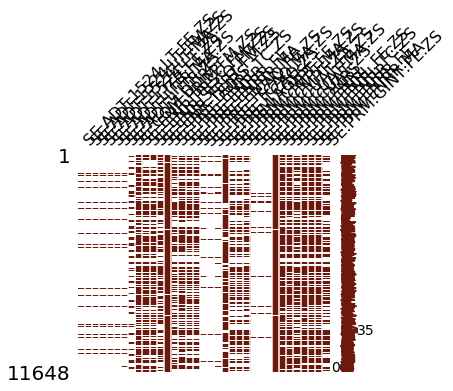

In [17]:
# Nullity or missing values by columns
msno.matrix(df=wb_data.iloc[:,3:38], figsize=(5, 4), color=(0.42, 0.1, 0.05))

### Mortalite dataset

In [18]:
#Données de mortalité selon les pays
world_mortality = pd.read_csv("/Users/Jenny/Desktop/P3A/mortalite_dataset/world_mortality.csv" , sep=",")

/Users/Jenny/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning:

Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.



In [19]:
# info on variable types and filling factor

print('Shape:',world_mortality.shape)

tab_info = pd.DataFrame(world_mortality.dtypes).T.rename(index={0:'column type'})
tab_info = tab_info.append(pd.DataFrame(world_mortality.isnull().sum()).T.rename(index={0:'null values'}))
tab_info = tab_info.append(pd.DataFrame(world_mortality.isnull().sum()/world_mortality.shape[0]*100).T.rename(index={0:'null values (%)'}))
tab_info

Shape: (3191598, 9)


,Unnamed: 0,type,gender,age,country,locality,ethnicity,period,incidence
column type,int64,object,int64,int64,object,object,float64,int64,int64
null values,0,0,0,0,0,2942190,3191598,0,0
null values (%),0,0,0,0,0,92.1855,100,0,0


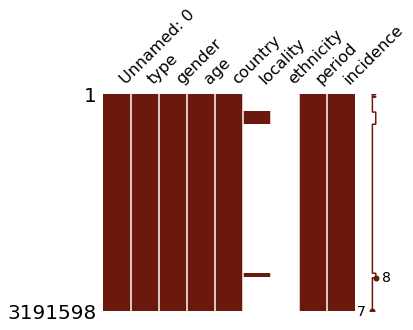

In [20]:
# Nullity or missing values by columns
msno.matrix(df=world_mortality, figsize=(5, 4), color=(0.42, 0.1, 0.05))

In [21]:
# Drop first column, useless
if 'Unnamed: 0' in world_mortality:
    world_mortality = world_mortality.drop(['Unnamed: 0'], axis=1)

# Drop missing values locality and ethnicity
#if 'locality' in world_mortality:
#    world_mortality = world_mortality.drop(['locality'], axis=1)
if 'ethnicity' in world_mortality:
    world_mortality = world_mortality.drop(['ethnicity'], axis=1)

The two following functions permits to access the reduced dataframe on a group of countries and a group of cancers

In [22]:
def world_mortality_reduit(groupe_pays, groupe_cancers):
    #Keep only one group of countries
    if groupe_pays != 'No':
        world_mortality_pays = world_mortality.loc[world_mortality['country'].isin(groupe_pays)]
    else:
        world_mortality_pays = world_mortality
    #Keep only some type of cancers
    world_mortality_red = world_mortality_pays.loc[world_mortality_pays.type.str.contains(groupe_cancers[0])]
    for cancer in groupe_cancers:
        w1 = world_mortality_pays.loc[world_mortality_pays.type.str.contains(cancer)]
        world_mortality_red = pd.concat([world_mortality_red, w1]) 
    return world_mortality_red
    
def nb_exemples_pays(groupe_pays, groupe_cancers):
    return {'nombre de pays sur ' + str(len(groupe_pays)) : len(world_mortality_reduit(groupe_pays, groupe_cancers).country.unique()), 'nombre exemples' : world_mortality_reduit(groupe_pays, groupe_cancers).shape[0]}

In [23]:
pays = {'afrique' : afrique, 'europe' : europe, 'am_sud' : am_sud, 'am_nord' : am_nord, 'am_centrale' : am_centrale, 'oceanie' : oceanie, 'asie' : asie}
cancers = {'cancers gynécologues' : ['C5', 'C60', 'C61', 'C62', 'C63', 'C64', 'C65', 'C66', 'C67', 'C68'],
           'cancers du pancréas' : ['C25'],
           'cancers digestifs plus fréquents (4)' : ['C15', 'C16', 'C18', 'C22']}

#rep = {}
#for nom_pays, liste_pays in pays.items():
#    for nom_cancers, liste_cancers in cancers.items():
#        rep[nom_pays + ' et ' + nom_cancers] = nb_exemples_pays(liste_pays, liste_cancers)
#print (rep)

In [24]:
#import pprint
#pp = pprint.PrettyPrinter(indent=4)
#pp.pprint(rep)

Le plus abordable semble être l'Asie: c'est un territoire dont les pays sont en voie de développement, qui peuvent être séparés en plusieurs sous-groupes et qui contiennent tout de même presque 1 millions de données.

Les cancers les plus répertoriés sont les cancers gynécologiques. Nous nous intéresserons donc à ceux-ci. 

In [25]:
world_mortality_red = world_mortality_reduit('No', ['C5', 'C60', 'C61', 'C62', 'C63', 'C64', 'C65', 'C66', 'C67', 'C68'])

In [26]:
world_mortality_red = world_mortality_red.drop('locality', axis = 1)
world_mortality_red = world_mortality_red.drop('type', axis = 1)

In [27]:
world_mortality_red = world_mortality_red.groupby(['country', 'period','gender', 'age'], as_index = False).sum()

In [28]:
world_mortality_red.shape

(127548, 5)

In [29]:
(min(world_mortality_red.period.unique()), max(world_mortality_red.period.unique()), world_mortality_red.period.unique().shape[0])

(1950, 2013, 64)

### Incidence dataset

In [30]:
#Données de l'incidence des cancers
incidence = pd.read_csv("/Users/Jenny/Desktop/P3A/incidence_dataset/training.txt" , sep=";")

/Users/Jenny/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning:

Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.



In [31]:
incidence.head()

,type,gender,age,country,town,ethnicity,period,incidence
0,C00-96 but C44,1,1,Canada,Manitoba,NaN,1958.0,1
1,C00-96 but C44,1,2,Canada,Manitoba,NaN,1958.0,3
2,C00-96 but C44,1,3,Canada,Manitoba,NaN,1958.0,6
3,C00-96 but C44,1,4,Canada,Manitoba,NaN,1958.0,3
4,C00-96 but C44,1,5,Canada,Manitoba,NaN,1958.0,4


## Indicators

In [32]:
wb_indicators = pd.read_csv("/Users/Jenny/Desktop/P3A/epidemiology_dataset/WorldBank_indicators.csv" , sep=",")

In [33]:
#wb_indicators.loc[wb_indicators.Code.str.contains("AG.")]

# Training

In [34]:
pays_etudies = world_mortality_red.country.unique()
wb_data_red = wb_data.loc[wb_data['area'].isin(pays_etudies)]
wb_data_red = wb_data_red.loc[wb_data_red['year'].isin(world_mortality.period)]

In [35]:
world_mortality_red = world_mortality_red.loc[world_mortality_red['period'].isin(wb_data_red.year)]

In [36]:
columns = wb_data_red.columns

In [37]:
period = world_mortality_red.period.unique()

In [38]:
wb_data_red = wb_data_red.loc[wb_data_red['area'].isin(pays_etudies)]
#wb_data_red = wb_data_red.drop('area_code', axis = 1)

In [39]:
wb_data_red = wb_data_red.rename(columns={'year': 'period', 'area' : 'country'})

In [40]:
wb_data_red.head()

,area_code,country,period,SE.ADT.1524.LT.FE.ZS,SE.ADT.1524.LT.FM.ZS,SE.ADT.1524.LT.MA.ZS,SE.ADT.1524.LT.ZS,SE.ADT.LITR.FE.ZS,SE.ADT.LITR.MA.ZS,SE.ADT.LITR.ZS,...,SL.UEM.TOTL.FE.ZS,SL.UEM.TOTL.MA.NE.ZS,SL.UEM.TOTL.MA.ZS,SL.UEM.TOTL.NE.ZS,SL.UEM.TOTL.ZS,SM.POP.NETM,SM.POP.REFG,SM.POP.REFG.OR,SM.POP.TOTL,SM.POP.TOTL.ZS
138,ALB,Albania,1970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54045.0,NaN
139,ALB,Albania,1971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140,ALB,Albania,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-99.0,NaN,NaN,NaN,NaN
141,ALB,Albania,1973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142,ALB,Albania,1974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
wb_data_red = wb_data_red.drop('area_code', axis = 1)

On récupère les deux fichiers pour les merge avec dataiku

In [42]:
wb_data_red.to_csv("./epidemium_wb_data_red.csv")

In [43]:
world_mortality_red.to_csv('./epidemium_world_mortality_red.csv')

On récupère le fichier merged

In [44]:
df = pd.read_csv("/Users/Jenny/Desktop/P3A/epidemium_train_test.csv" , sep=",")

In [45]:
df.shape

(14436, 87)

Feature importance

On ne garde que les 15 features les plus importantes

In [52]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'silent': 1,
    'seed' : 0
}


d_train = xgb.DMatrix(X_train, y_train, feature_names=X_train.columns.values)
model = xgb.train(dict(xgb_params, silent=0), d_train, num_boost_round = 100)

importance = model.get_fscore()
features_df = pd.DataFrame()
features_df['feature'] = importance.keys()
features_df['fscore'] = importance.values()
features_df['fscore'] = features_df['fscore'] / features_df['fscore'].sum()
features_df.sort_values(by = ['fscore'], ascending = True, inplace = True)

plt.figure()
features_df.plot(kind = 'barh', x = 'feature', y='fscore', legend = False, figsize = (10, 10))
plt.title('XGBoost Feature Importance')
plt.xlabel('fscore')
plt.ylabel('features')
plt.show()

print(features_df)

AttributeError: module 'xgboost' has no attribute 'DMatrix'

In [46]:
important_features = ['AG.PRD.CROP.XD', 
                      'EN.ATM.GHGO.KT.CE', 
                      'SP.URB.TOTL', 
                      'EN.ATM.GHGT.KT.CE', 
                      'SP.RUR.TOTL',
                     'AG.LND.TOTL.K2',
                     'EN.ATM.METH.KT.CE',
                     'EN.POP.DNST',
                     'EN.ATM.NOXE.KT.CE',
                     'AG.PRD.LVSK.XD',
                     'AG.PRD.FOOD.XD',
                     'SP.URB.GROW',
                     'SP.RUR.TOTL.ZG',
                     'SP.DYN.CDRT.IN',
                     ]

In [47]:
col_list = ['country', 'period', 'gender', 'age', 'incidence']
col_list.extend(important_features)

In [48]:
df_important = df[col_list]

On trie df par ordre chronologique afin de tester sur les données les plus récentes

In [49]:
df_important = df_important.sort_values(by = ['period'])
df_important = df_important.reset_index(drop=True)

In [50]:
y = df_important['incidence']
X = df_important.drop(['incidence'], axis = 1)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Data Engineering

In [48]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import time

In [123]:
# Set up folds
K = 10
kf = sk.model_selection.KFold(n_splits = K, random_state = 1, shuffle = True)
np.random.seed(0)

In [124]:
MAX_ROUNDS = 400
OPTIMIZE_ROUNDS = False
LEARNING_RATE = 0.07
EARLY_STOPPING_ROUNDS = 50 

In [54]:
model = xgb.XGBClassifier(    
                        n_estimators=MAX_ROUNDS,
                        max_depth=4,
                        objective="binary:logistic",
                        learning_rate=LEARNING_RATE, 
                        subsample=.8,
                        min_child_weight=6,
                        colsample_bytree=.8,
                        scale_pos_weight=1.6,
                        gamma=10,
                        reg_alpha=8,
                        reg_lambda=1.3,
                     )

AttributeError: module 'xgboost' has no attribute 'XGBClassifier'

In [ ]:
y_valid_pred = 0*y
y_test_pred = 0

In [ ]:
for i, (train_index, test_index) in enumerate(kf.split(data_train)):
    
    # Create data for this fold
    y_train, y_valid = y.iloc[train_index].copy(), y.iloc[test_index]
    X_train, X_valid = X.iloc[train_index,:].copy(), X.iloc[test_index,:].copy()
    X_test = data_test.copy()
    print( "\nFold ", i)

    # Run model for this fold
    if OPTIMIZE_ROUNDS:
        eval_set=[(X_valid,y_valid)]
        fit_model = model.fit( X_train, y_train, 
                               eval_set=eval_set,
                               eval_metric=gini_xgb,
                               early_stopping_rounds=EARLY_STOPPING_ROUNDS,
                               verbose=False
                             )
        print( "  Best N trees = ", model.best_ntree_limit )
        print( "  Best gini = ", model.best_score )
    else:
        fit_model = model.fit( X_train, y_train )
        
    # Generate validation predictions for this fold
    pred = fit_model.predict_proba(X_valid)[:,1]
    print( "  Accuracy = ", accuracy_score(y_valid, pred) )
    y_valid_pred.iloc[test_index] = pred
    
    # Accumulate test set predictions
    y_test_pred += fit_model.predict_proba(X_test)[:,1]
    
    del X_test, X_train, X_valid, y_train

y_test_pred /= K  # Average test set predictions

print( "\Accuracy for full training set:" )
eval_gini(y, y_valid_pred)

In [ ]:
for col in data.columns:
    print (col)

xgboost

In [85]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [141]:
train_df = pd.read_csv("/Users/Jenny/Downloads/train.csv" , sep=",").drop('country', axis = 1)

In [142]:
train = train_df[:10105]
test = train_df[10105:]

In [158]:
y = train['incidence'].values
y_test = test['incidence'].values

In [159]:
train_x = train.drop(['incidence'], axis=1)
test_x = test.drop(['incidence'], axis = 1)

In [160]:
X_train, X_validation, y_train, y_validation = train_test_split(train_x, y, train_size=0.9, random_state=1234)

In [161]:
dtrain = xgb.DMatrix(X_train, y_train)
dvalidation = xgb.DMatrix(X_validation, y_validation)
dtest = xgb.DMatrix(test_x)

In [174]:
param = {}
param['objective'] = 'multi:softmax'
param['eta'] = 0.02
param['silent'] = True
param['max_depth'] = 5
param['subsample'] = 0.8
param['colsample_bytree'] = 0.8
param['eval_metric'] = 'auc'
param['num_class'] = 16000

In [175]:
evallist  = [(dvalidation,'eval'), (dtrain,'train')]

In [ ]:
model = xgb.train(param, dtrain, 963, evallist, early_stopping_rounds=100, maximize=True, verbose_eval=9)

In [ ]:
pred = model.predict(dtest)
#y_validation=list(y_validation)